## 1. LOAD THE DATASET ##

In [302]:
import pandas as pd 

In [303]:
df=pd.read_csv("C:\\Users\\pavan\\Desktop\\dataScience\\Telco_Churn_Project\\telco_churn.csv")


## 2. UNDERSTAND THE DATASET ##

##  it will display the first five rows ##

In [304]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##  Column types, non-null counts ##

In [305]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##  Summary stats for numerical columns ##

In [306]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## List of all column names ##

In [307]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data types of each column ## 

In [308]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Rows , Columns ## 

In [309]:
df.shape

(7043, 21)

## Count of missing values ## 

In [310]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3. DATA CLEANING ##

- convet 'Total Charges' to numeric (it's object due to bad entries)


-  Drop rows with missing Totalcharges

In [311]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')
df.dropna(subset=['TotalCharges'],inplace=True)





## Chech for missing after conversion ##  

In [312]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Remove unnecessary columns ## 

In [313]:
df.drop(['customerID'], axis=1, inplace=True)

## 4. Exploratory data analysis(EDA) ##



- EDA To understand the patterns in the data, find key relationships, and get insights about which features influence Churn (our target). 

## 4.1 Check Target column (Churn Distribution). ## 

## What ? ##

- Visualize how many customers churn vs stayed.

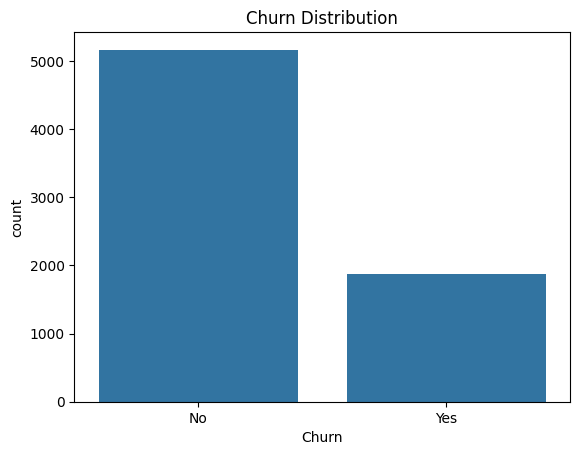

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn' , data=df)
plt.title('Churn Distribution')
plt.show()

# shows count of customers who churned vs those who stayed
print(df['Churn'].value_counts())

## 4.2 Analyse numerical feautures ##


## What ? ## 

- Look at 'tenure', 'MonthlyCharges', 'Totalcharges'.

## Why ?

- To see how values are different from churned customers vs not churned customers.


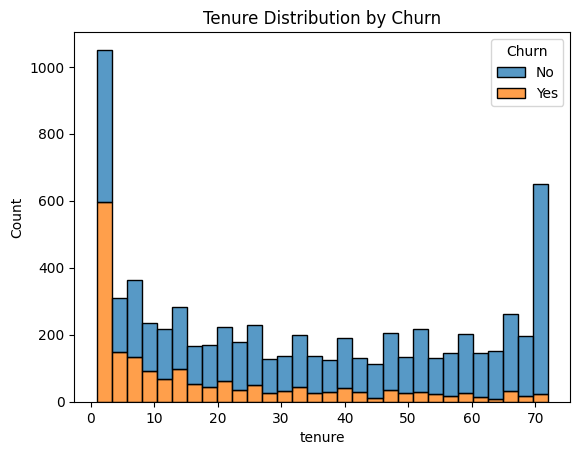

In [315]:
# tenure distribution 

sns.histplot(data=df, x='tenure', hue = 'Churn', multiple= 'stack', bins=30,)
plt.title('Tenure Distribution by Churn')
plt.show()

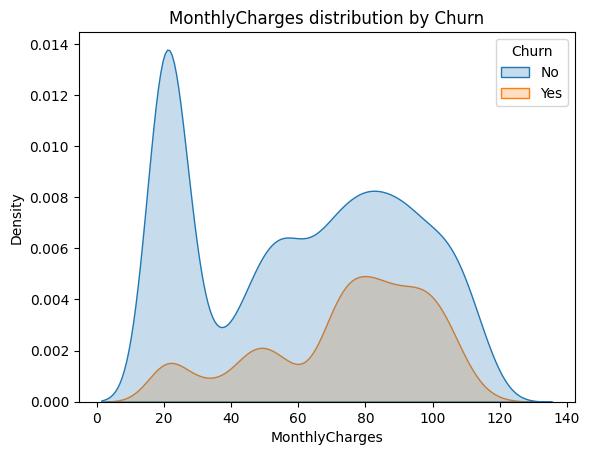

In [316]:
# MonthlyCharges distribution

sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('MonthlyCharges distribution by Churn')
plt.show()

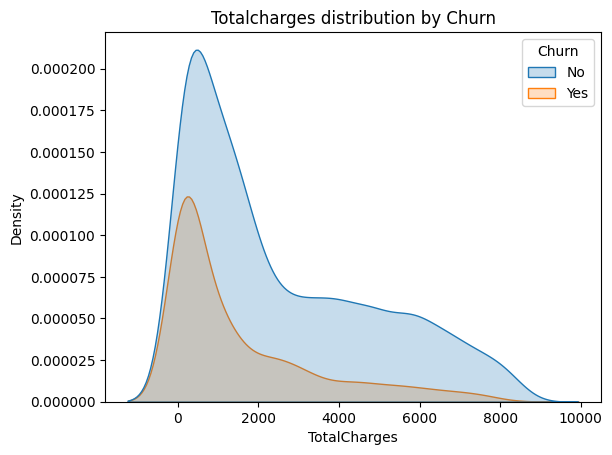

In [317]:
# TotalCharges doistribution
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Totalcharges distribution by Churn')
plt.show()


## 4.3 Analysis of Categorical features ##


- compare churn and rate across the categories

In [318]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]


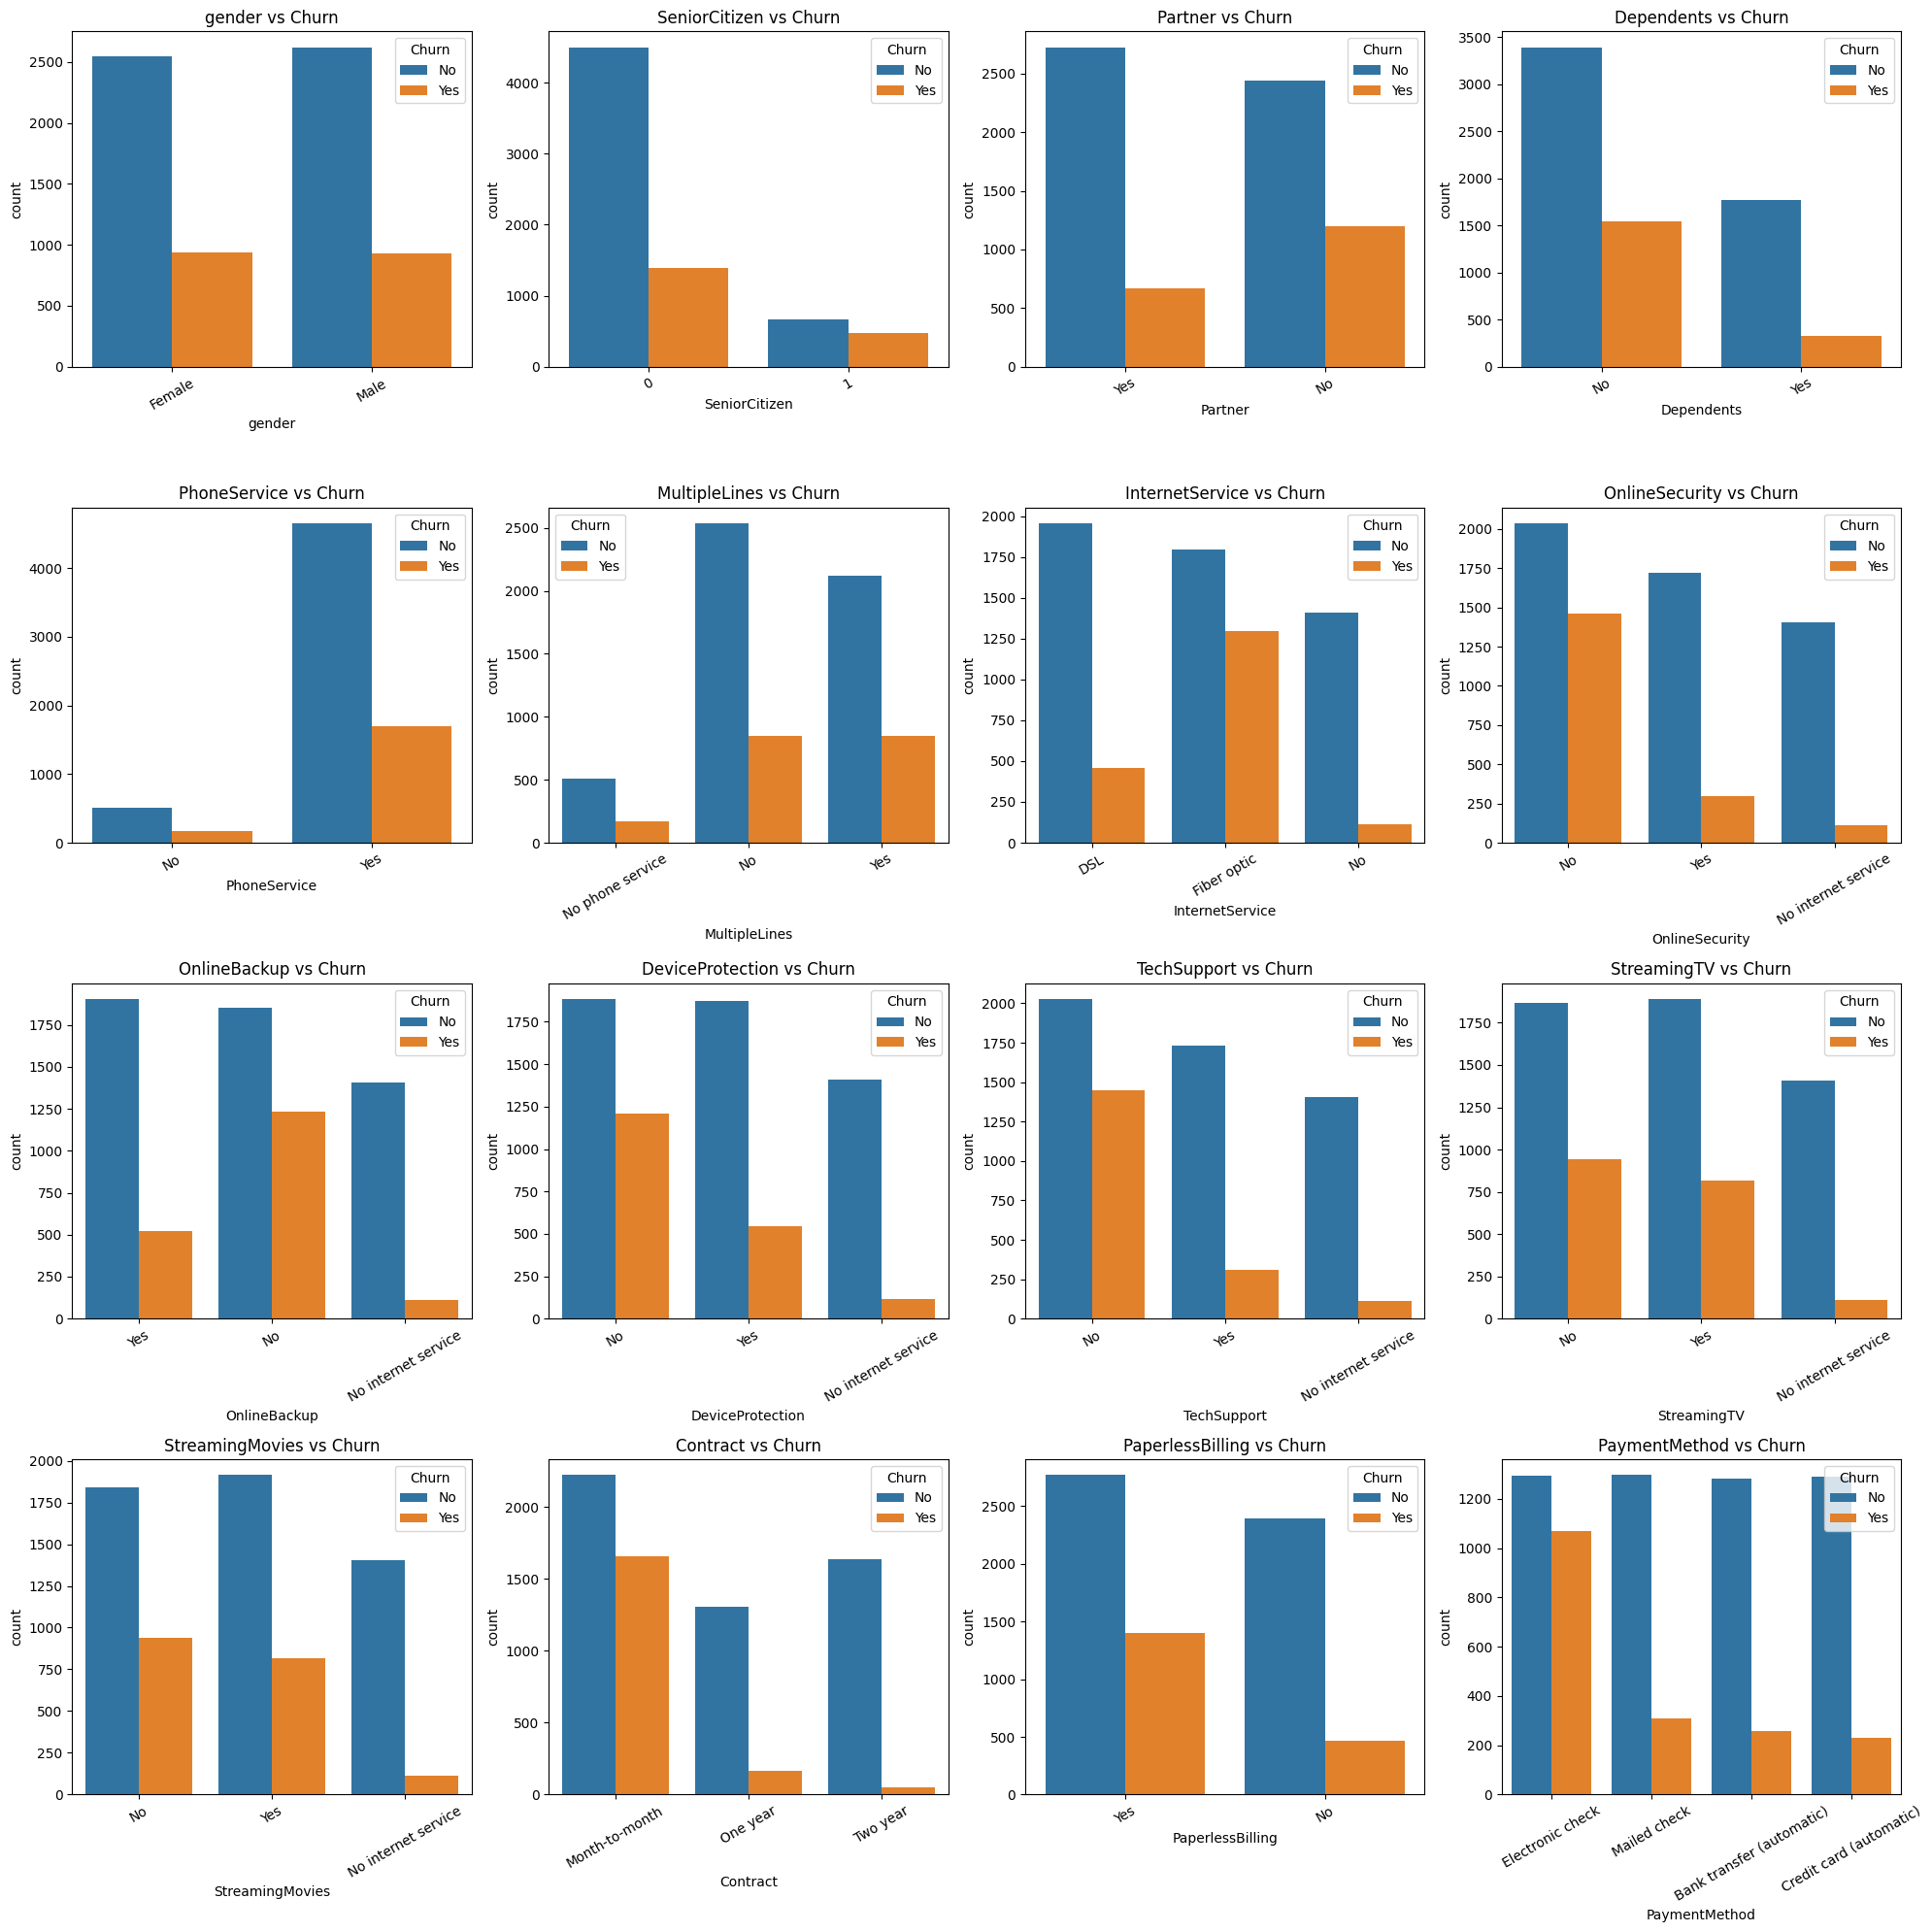

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 20))

# Loop through columns and plot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)  # 4 rows, 4 columns, index i
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()  # Adjust layout to prevent overlap


## 4.4 correlation Heatmap (numerical only) ##

  - To check correlation between numerical features 

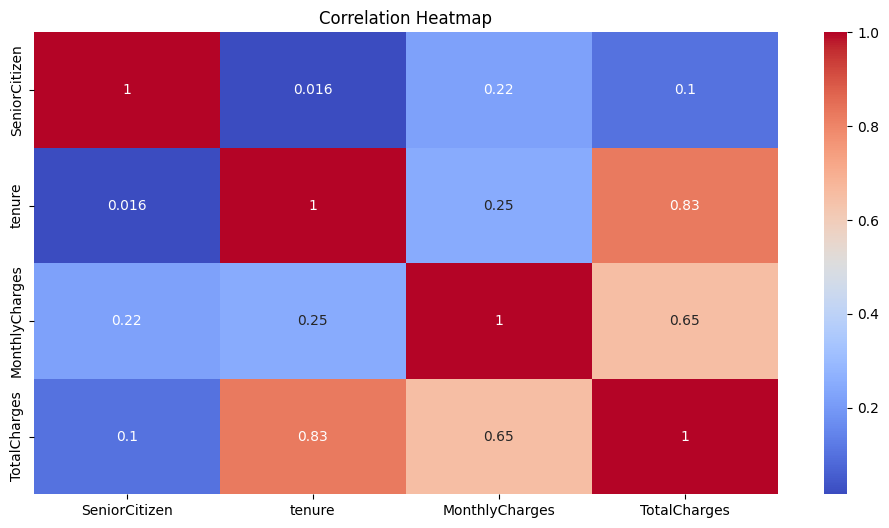

In [320]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## 4.5 Outliers check ##

- Only for numeric variables using boxplots.

<Axes: >

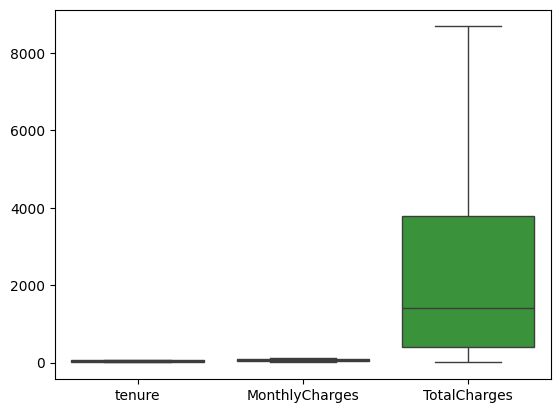

In [321]:
# Outliers check using boxplots for numeric variables

sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges']])

## 4.6 PairPLot

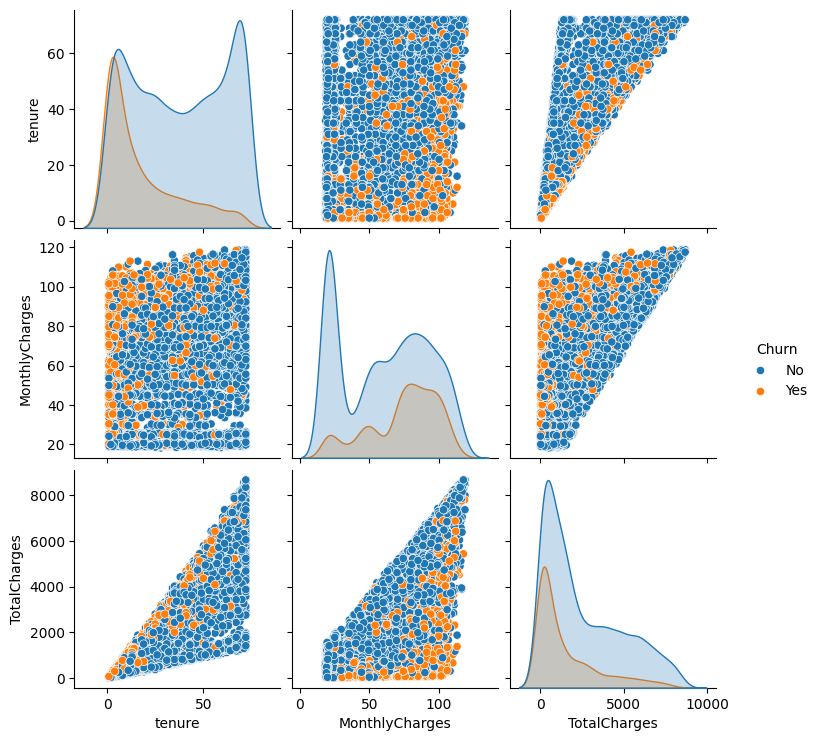

In [322]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

## 5. DATA PREPROCESSING ## 

- Prepare the data for modeling by encoding and scaling. 

- ML models need numerical values and scaled features for performance. 

## 5.1 Encode categorical columns ##

In [323]:
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender']


## 5.2 LabelEncoder : For Binary columns ('yes','no') and ('male','female') ## 

- fit() → Looks at the unique values in the column (e.g., 'Yes', 'No') 

- transform() → Converts those values into numbers 

- fit_transform() does both in one step.       


In [324]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

## 5.3 one-hot encoding for multiple categories ##

In [348]:
df = pd.get_dummies(df, drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,1,0.664868,-0.129180,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,1.612573,1,1,1.276493,2.241056,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,-0.872808,0,1,-1.170004,-0.854514,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,-1.158016,1,1,0.319168,-0.872095,1,...,False,False,False,False,False,False,False,False,False,True


In [355]:
# save the columns
with open("model/columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

## 5.4 Feauture Scaling (Standardization) ##




 ## Why Feature Scaling? ##
- Machine learning models like Logistic Regression, SVM, and KNN are sensitive to feature scales.
- Features like `tenure`, `MonthlyCharges`, and `TotalCharges` can have very different ranges.
- Scaling brings all values to a similar range — making the model **faster and more accurate**. 


## What is Standardization? ##

- Standardization is the process of scaling your data so that:

- The mean becomes 0

- The standard deviation becomes 1

- helping machine learning models learn better and faster.

In [356]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [357]:
import pickle

# Save the scaler
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


## 6. Train-Test Split ##

## What ?

- Splitting the dataset into training and testing subsets.

## Why ? ##

- Train the model on one part of data(training set).
- Evaluate the model on unseen data(test set)
- Avoid overfitting 

## 6.1 Define features (X) and Target(y) ##

- The target column is usually "Churn" (0 or 1).

In [358]:
# x = all columns except 'Churn'
# y = targeted column

X = df.drop('Churn', axis=1)
y = df['Churn']

## 6.2 Import and apply train-test split method ##

## Why we use ##

- test_size = 0.2: 80% for traing, 20% for testing.

- random_state = 42: Reproducibility(random any number).

   It means getting the same results every time you run the code.without this train_test_split(or model results) will change every time so cant able to repeat the work.

- stratify = y : # this keeps the samme ratio of classes(0 or 1) in both train and test.

  If we dont use then the most customers did not churn(0), and fewer customers did churn(1).This is called "class imbalance".And it will end up with too many churned or too many non-churned customers 


In [359]:
# spkit into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)


# 6.3 Confirm the shape of the splits # 

In [360]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
      


X_train shape: (5625, 30)
y_train shape: (5625,)
X_test shape: (1407, 30)
y_test shape: (1407,)


## 7.Model Training ##

## 7.1 Logistic Regression ## 



## What ? ##

- It's a supervised machineleaning learning algorithm used to predict binary outcomes :


- predicts a "categorical" outcome : churn prediction (0 or 1)

## Why ? ## 

- It's easy to implement.
 
- Good for interpreting feature importance.

- Works well on linearly seperable data.

- Acts as a baseline model before testing more complex models.

## Import and train the model ## 

In [361]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_model = LogisticRegression(max_iter=1000)

# fir the model on training data
log_model.fit(X_train, y_train)





,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


##  Make predictions ##

In [362]:
log_preds = log_model.predict(X_test)

##  Evaluate the Model ## 

 

##  Let's check performimg ##

- Accuracy 

- Confusion Matrix

- classification report ( Precision, Recall, F1 score)



## 1. Accuracy ##



## What ? ## 

- Accuracy = (True Positives + True Negatives) / (Total Predictions)

## Why ## 

- Simple way to measure performance.

- But not always reliable if classes are imbalanced.

In [363]:
from sklearn.metrics import accuracy_score

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)





Accuracy score: 0.8045486851457001


## 2. Confusion Matrix ##

## What ## 

- Matrix shows that how many churns / non churn customers are correctly and incorectly predicted.



-                 Predicted No          Predicted Yes

-       Actual No   -  TN                  FP

-       Actual Yes  -  FN                  TP


- TN = True Negative (correctly predicted no churn)

- FP = False Positive (Predicted churn but actually didn't)

- FN = False Negative (Predicted no churn but actually churned)

- TP = True Positive (correctly predicted churn)

## why ? ## 

- Helps to understand where the model is going wrong.

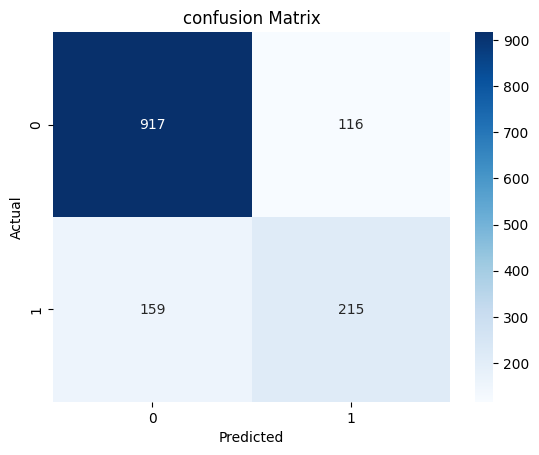

In [364]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


# Confusion Matric

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [365]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[917 116]
 [159 215]]



                         Predicted
                          0     1
      Actual       0   [917   116]
                   1   [159   215]

- 917 --> True Negatives (TN): Actual = 0 (No churn), Predicted = 0

- 116 --> False Positives (FP): Actual = 0 (No churn), Predicted = 1

- 159 --> False Negatives (FN): Actual = 1 (Churn), Predicted = 0

- 215 -->  True Positives (TP): Actual = 1 (Churn), Predicted = 1

## 3. Classification Report ## 

## What ? ##
                          
-                                  Metric Meaning
-      Precision	Out of predicted churns, how many actually churned? → TP / (TP + FP)
-      Recall	       Out of actual churns, how many did we catch? → TP / (TP + FN)
-      F1Score	         2 * (Precision * Recall) / (Precision + Recall)

## Why ? ##

- Helps when data is imbalanced.

- F1-score is very useful for churn cases ( We care more about not missing churns).

In [366]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



## 7.2 Random Forest Model ##

## What ? ##

- An ensemble learning method (combines multiple decision trees).

- Handles non-linear relationships and imbalanced data well.

- Provides feature importance (helps explain predictions).

| Reason                             | Explanation                                                              |
| ---------------------------------- | ------------------------------------------------------------------------ |
| Handles both categorical & numeric | Works well with the kind of mixed data you have in Telco dataset         |
| Reduces Overfitting                | It combines many trees → reduces variance                                |
| High Accuracy                      | Often performs better than a single Decision Tree or Logistic Regression |
| Feature Importance                 | Tells which features affect churn the most                               |
| Easy to Use                        | No need for much parameter tuning at start                               |


## import and train the model ## 

In [367]:
from sklearn.ensemble import RandomForestClassifier

# inititalise the model 
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# n_estimators=100: Builds 100 trees (you can increase this to improve performance).
# random_state: Ensures reproducible results.

# train the model 

rf_model.fit(X_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predict the model ## 

In [368]:
rf_preds =  rf_model.predict(X_test)

## Evaluate the model Performance ##

In [369]:
from sklearn.metrics import classification_report

# classification report

print("Random forest Classification Report:\n",classification_report(y_test, rf_preds))



Random forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# Interpretation:

- Look at precision, recall, and f1-score for both classes (Churn = 0 and Churn = 1).

- Especially focus on Churn=1 (your positive class)

## Confusion Matrix ##

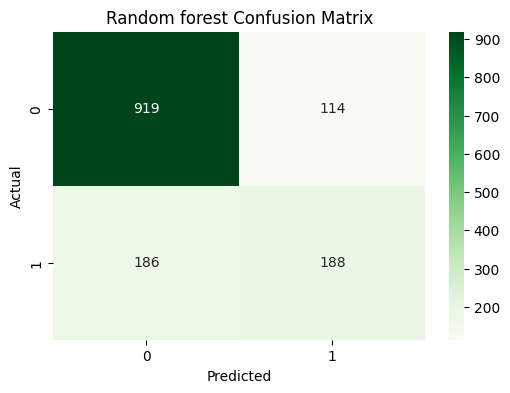

In [370]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix

cm = confusion_matrix(y_test, rf_preds)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Interpretation:

- Top-left = Correct predictions of No Churn

- Bottom-right = Correct predictions of Churn

- Off-diagonal = Mistakes

## Feature Importance it is "Bonus for interpretation "  ##

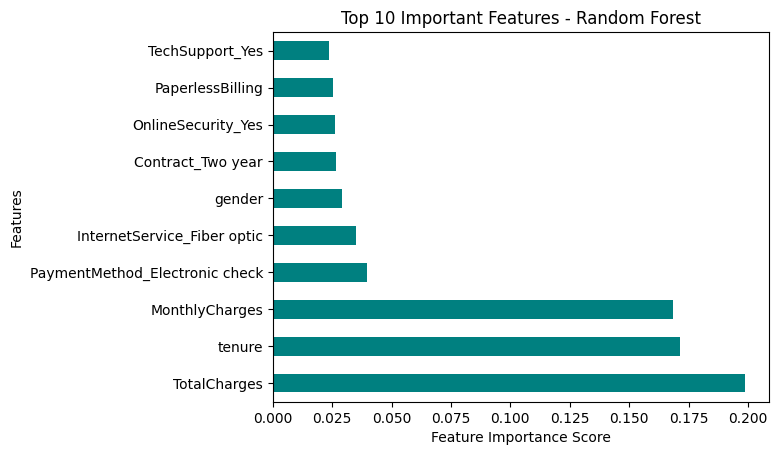

In [371]:
# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot top 10 important features
feature_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


## 7.3 Model Comparison ##

## Assuming you have already:

- Trained log_model (LogisticRegression)

- Trained rf_model (RandomForestClassifier)

- Stored predictions as log_preds and rf_preds

- Actual test labels in y_test

## 1. Classification Reports ##

In [372]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n")
print(classification_report(y_test, log_preds))

print("Random forest Report:\n")
print(classification_report(y_test, rf_preds))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Random forest Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## How to Compare:

- Look at precision, recall, and f1-score for class 1 (Churn)

- Higher recall for class 1 means better at catching churners

- Higher f1-score means better balance

## 2. Confusion Matrix Comparison ##

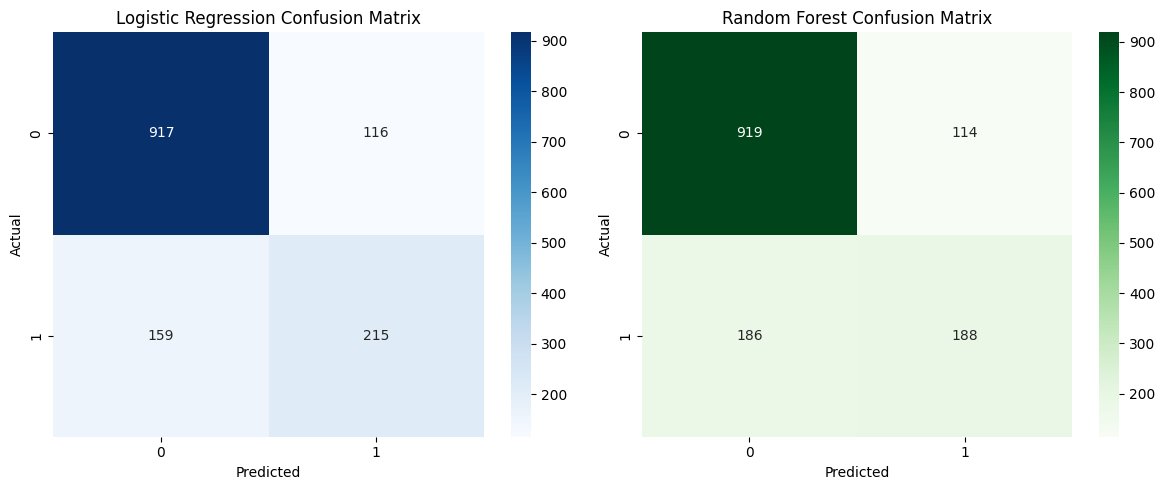

In [373]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


# How to Compare:

- Check how many true positives (Churn=1 correctly predicted) each model catches.

- Fewer false negatives (missed churners) = better.

## 3. Accuracy Score ##

In [ ]:
from sklearn.metrics import accuracy_score

print("LogisticRegression accuracy score:", accuracy_score(y_test, log_preds))
print("RandomForest accuracy score:", accuracy_score(y_test, rf_preds))

LogisticRegression accuracy score: 0.8045486851457001
RandomForest accuracy score: 0.7867803837953091


## 8. Deployment ##

In [ ]:
import pickle 
with open ("model//LogisticRegressionModel", "wb") as file:
    pickle.dump(log_model, file)

- pickle is used to serialize Python objects like ML models.

- "wb" mode stands for write binary — needed to save the model in binary format.

- log_model is the trained model.

- The file LogisticRegressionModel is saved inside the model directory.